In [79]:
import csv
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 13

In [80]:
def load_csv_results(filename, time_unit):
    data_iterative = []
    data_4_clients = []
    data_8_clients = []
    data_32_clients = []
    with open(filename, "r") as f:
        reader = csv.reader(f, delimiter=";")
        headers = next(reader)
        print(headers)
        for row in reader:
            n_clients = int(row[0])
            time = int(row[1])
            if time_unit == "ms":
                time = time / 1e6
            if time_unit == "s":
                time = time / 1e9
            if n_clients == 1:
                data_iterative.append(time)
            elif n_clients == 4:
                data_4_clients.append(time)
            elif n_clients == 8:
                data_8_clients.append(time)
            elif n_clients == 32:
                data_32_clients.append(time)
    return (
        np.array(data_iterative),
        np.array(data_4_clients),
        np.array(data_8_clients),
        np.array(data_32_clients),
    )

In [81]:
def plot_results(data, title, time_unit):
    data_1, data_4, data_8, data_32 = data
    data_1_mean = np.mean(data_1)
    data_4_mean = np.mean(data_4)
    data_8_mean = np.mean(data_8)
    data_32_mean = np.mean(data_32)

    data_1_std = np.std(data_1)
    data_4_std = np.std(data_4)
    data_8_std = np.std(data_8)
    data_32_std = np.std(data_32)

    means = [data_1_mean, data_4_mean, data_8_mean, data_32_mean]
    stds = [data_1_std, data_4_std, data_8_std, data_32_std]
    clients = ["1", "4", "8", "32"]

    plt.figure(figsize=(8, 6))
    plt.bar(clients, means, yerr=stds, capsize=5)
    plt.xlabel("Número de delegados concurrentes")
    plt.ylabel(f"Tiempo ({time_unit})")
    plt.title(title)

    for i, mean in enumerate(means):
        plt.text(
            i,
            mean + stds[i],
            f"{(round(mean))} $\pm$ {round(stds[i])} {time_unit}",
            ha="center",
            va="bottom",
        )

    plt.show()

In [82]:
def plot_reto_decipher_boxplots(data, title, time_unit):
    data_1, data_4, data_8, data_32 = data
    data_to_plot = [data_1, data_4, data_8, data_32]
    clients = ["1", "4", "8", "32"]

    plt.boxplot(data_to_plot, labels=clients)
    plt.xlabel("Número de delegados concurrentes")
    plt.ylabel(f"Tiempo ({time_unit})")
    plt.title(title)
    plt.show()

['n_concurrent', 'time_ns']


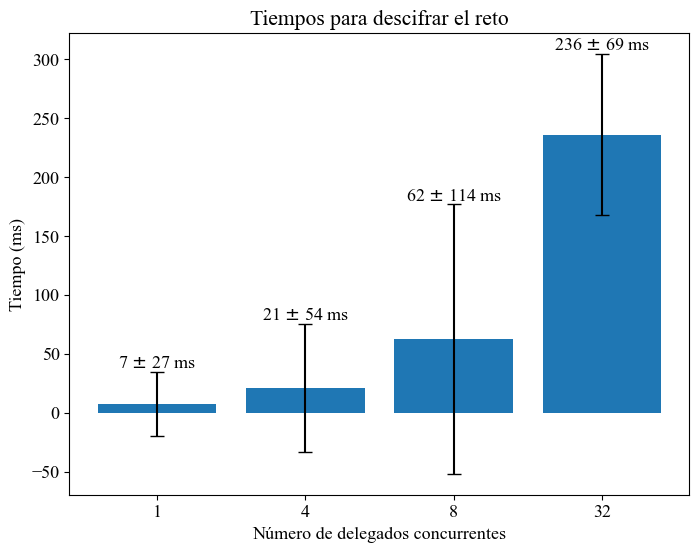

['n_concurrent', 'time_ns']


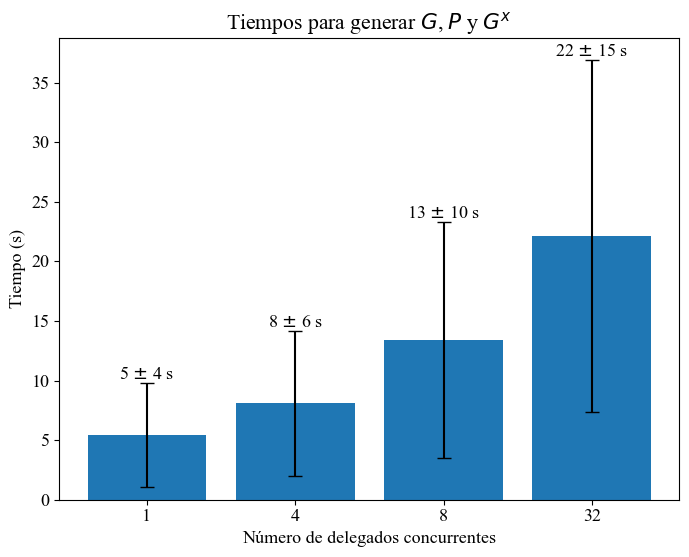

['n_concurrent', 'time_ns']


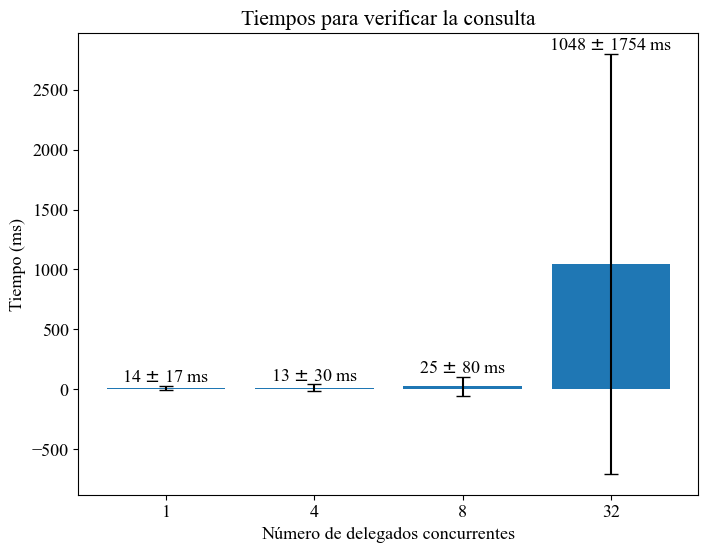

In [83]:
reto_data = load_csv_results("reto.csv", "ms")
plot_results(reto_data, "Tiempos para descifrar el reto", "ms")
# plot_reto_decipher_boxplots(reto_data, "Tiempos para descifrar el reto", "ms")

diffie_hellman_data = load_csv_results("diffie_hellman.csv", "s")
plot_results(diffie_hellman_data, "Tiempos para generar $G$, $P$ y $G^x$", "s")
# plot_reto_decipher_boxplots(diffie_hellman_data, "Tiempos para generar $G$, $P$ y $G^x$", "s")

query_data = load_csv_results("query_verification.csv", "ms")
plot_results(query_data, "Tiempos para verificar la consulta", "ms")

In [84]:
def load_cipher_results_csv():
    data_iterative = []
    data_4_clients = []
    data_8_clients = []
    data_32_clients = []
    with open("pkg_state_cipher.csv", "r") as f:
        reader = csv.reader(f, delimiter=";")
        headers = next(reader)
        print(headers)
        for row in reader:
            n_clients = int(row[0])
            is_symmetric = int(row[1])
            time = int(row[2]) / 1e6
            if n_clients == 1:
                data_iterative.append([is_symmetric, time])
            elif n_clients == 4:
                data_4_clients.append([is_symmetric, time])
            elif n_clients == 8:
                data_8_clients.append([is_symmetric, time])
            elif n_clients == 32:
                data_32_clients.append([is_symmetric, time])

    return (
        np.array(data_iterative),
        np.array(data_4_clients),
        np.array(data_8_clients),
        np.array(data_32_clients),
    )

In [85]:
def plot_cipher_results(cipher_data):
    data_iterative, data_4_clients, data_8_clients, data_32_clients = cipher_data
    symmetric_means = []
    asymmetric_means = []
    clients = ["1", "4", "8", "32"]

    for data in [data_iterative, data_4_clients, data_8_clients, data_32_clients]:
        symmetric_times = [time for is_symmetric, time in data if is_symmetric == 1]
        asymmetric_times = [time for is_symmetric, time in data if is_symmetric == 0]

        symmetric_means.append(np.mean(symmetric_times))
        asymmetric_means.append(np.mean(asymmetric_times))

    x = np.arange(len(clients))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(
        x - width / 2,
        symmetric_means,
        width,
        label="Simétrico: AES",
    )
    bars2 = ax.bar(
        x + width / 2,
        asymmetric_means,
        width,
        label="Asimétrico: RSA",
    )

    ax.set_xlabel("Número de delegados concurrentes")
    ax.set_ylabel("Tiempo (ms)")
    ax.set_title(
        "Tiempo promedio de cifrado del estado del paquete para\ndiferente número de delegados concurrentes y algoritmo de cifrado"
    )
    ax.set_xticks(x)
    ax.set_xticklabels(clients)
    ax.legend()

    for i, mean in enumerate(symmetric_means):
        ax.text(i - width / 2, mean, f"{mean:.2f} ms", ha="center", va="bottom")

    for i, mean in enumerate(asymmetric_means):
        ax.text(i + width / 2, mean, f"{mean:.2f} ms", ha="center", va="bottom")

    plt.show()


['n_concurrent', 'is_symmetric', 'time_ns']


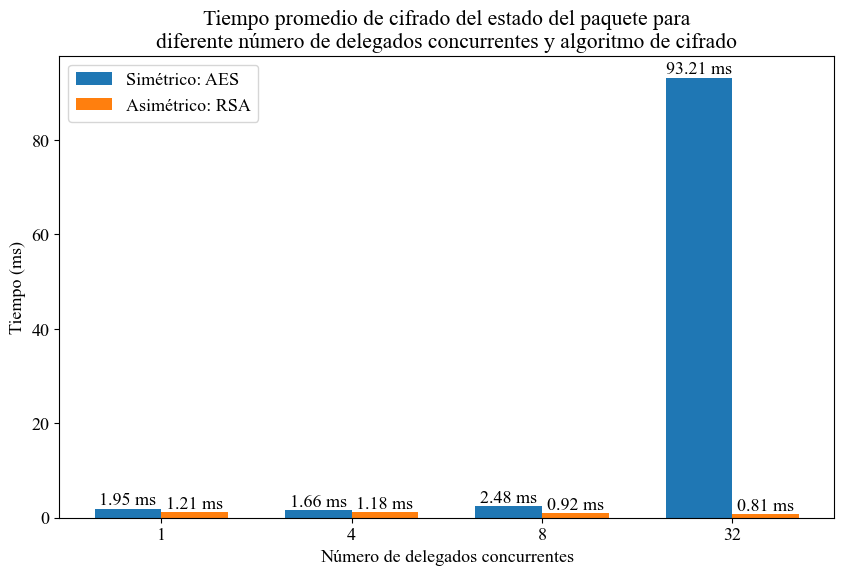

In [86]:
cipher_data = load_cipher_results_csv()
plot_cipher_results(cipher_data)